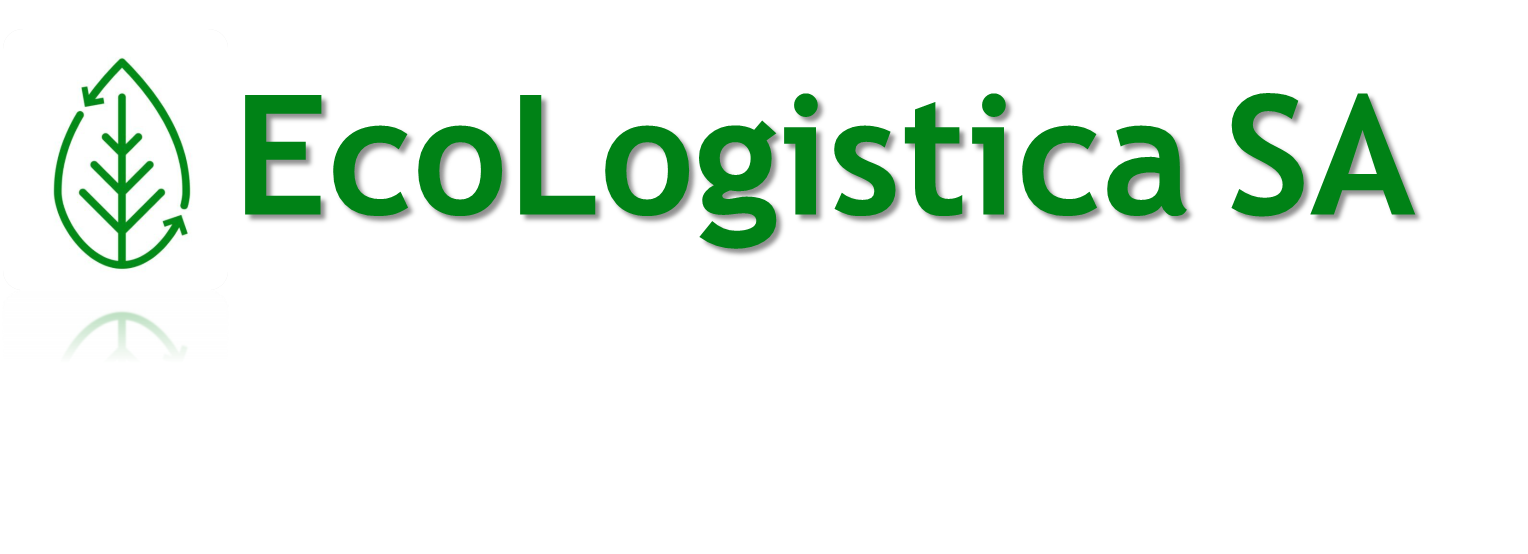

#  <span style="color:rgb(50,100,100);"><strong>&#128304; Desafío entregable #13: Desafío_EvaluaciónML &#128304;</strong></span>

### ⏩ **9. <u>ALGORITMO ML MPV </u>** 

In [1]:

#Cargamos las librerías
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import missingno as msno;
import warnings;
import datetime as dt;
import matplotlib.ticker as mtick;
warnings.filterwarnings("ignore");

# Configurar pandas para que muestre toda la tabla sin truncar los datos
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);
pd.set_option('display.width', None);
import locale;

# Establecemos el locale a español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8');

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
ruta='F:\\Proyecto\\Proyecto_Coder_DS\\set de datos\\archivo_final.csv'
dfxx = pd.read_csv(ruta, delimiter='|',parse_dates=["fecha"])

In [4]:
dfxx.head()

,id,cliente_id,cliente_nombre,servicio,tipo_operacion,bultos,peso,grupo,estado,fecha_hora,fecha_hora2,tipo_cambio_bna_vendedor,precio,precio_USD,total_costo,total_costo_USD,margen_ganancia,margen_ganancia_USD,rentabilidad,rentabilidad_USD,cp_destino,localidad_destino,provincia_destino,zona_destino,subzona_destino,cordon_destino,cp_origen,localidad_origen,provincia_origen,zona_origen,subzona_origen,cordon_origen,movimiento,Month_1,mes_1,day_1,dia_1,semana_1,anio_1,fecha,clasificacion del cliente
0,398567,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,3.00,DEVOLUCION,2DAV-2 VISITA SIN CONTACTO ALGUNO,2020-01-03 10:55:58,2020-01-03,63.0,555.0,8.809524,70.0,1.111111,485.0,7.698413,0.873874,0.873874,1611,DON TORCUATO,BUENOS AIRES,AMBA,GBA,3,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
1,416738,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,3.00,ENTREGADA,POD-ENTREGADA,2020-01-03 08:51:37,2020-01-03,63.0,555.0,8.809524,70.0,1.111111,485.0,7.698413,0.873874,0.873874,1888,FLORENCIO VARELA,BUENOS AIRES,AMBA,GBA,3,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
2,416708,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,3.25,ENTREGADA,POD-ENTREGADA,2020-01-03 08:10:18,2020-01-03,63.0,555.0,8.809524,70.0,1.111111,485.0,7.698413,0.873874,0.873874,1801,EZEIZA,BUENOS AIRES,AMBA,GBA,3,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
3,416709,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,6.00,DEVOLUCION,DEVME-DEVOLUCION DE MERCADERIA AL CLIENTE,2020-01-03 08:11:45,2020-01-03,63.0,645.0,10.238095,70.0,1.111111,575.0,9.126984,0.891473,0.891473,1706,HAEDO,BUENOS AIRES,AMBA,GBA,2,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno
4,416710,454,SmartGenetics SRL,SAC (con retiro producto),ENTREGA PAQUETERIA,1,6.00,DEVOLUCION,SPROD-NO TIENE PRODUCTO,2020-01-03 08:12:58,2020-01-03,63.0,645.0,10.238095,70.0,1.111111,575.0,9.126984,0.891473,0.891473,1824,LANUS,BUENOS AIRES,AMBA,GBA,2,1000,CAPITAL FEDERAL,BUENOS AIRES,AMBA,CABA,1,AMBA-AMBA,enero,1,viernes,3,1,2020,2020-01-01,Muy bueno


In [7]:
for column in sorted(dfxx.columns):
    print(column) 

Month_1
anio_1
bultos
clasificacion del cliente
cliente_id
cliente_nombre
cordon_destino
cordon_origen
cp_destino
cp_origen
day_1
dia_1
estado
fecha
fecha_hora
fecha_hora2
grupo
id
localidad_destino
localidad_origen
margen_ganancia
margen_ganancia_USD
mes_1
movimiento
peso
precio
precio_USD
provincia_destino
provincia_origen
rentabilidad
rentabilidad_USD
semana_1
servicio
subzona_destino
subzona_origen
tipo_cambio_bna_vendedor
tipo_operacion
total_costo
total_costo_USD
zona_destino
zona_origen


Dropdown(description='Opción:', index=1, options=('Cliente Específico', 'Global'), value='Global')

Dropdown(description='Cliente:', options=(' Abacus IT SRL', ' AeroCargo SA', ' AgroEco SA', ' AgroSur', ' Agro…

Button(description='Predecir', style=ButtonStyle())

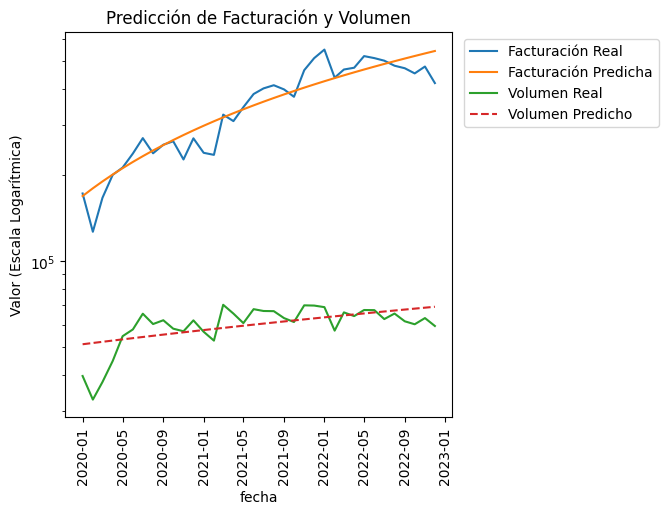

In [8]:
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display, clear_output

# Paso 1: Preparación de los datos
cliente_data = dfxx.groupby(['cliente_nombre', 'fecha']).agg({'precio_USD': 'sum', 'id': 'count'}).reset_index()

# Opción 1: Seleccionar un cliente específico
cliente_nombres = cliente_data['cliente_nombre'].unique()

# Paso 3: Definir función de predicción y gráfica
def predecir_facturacion(opcion, cliente_nombre):
    if opcion == 'Cliente Específico':
        data = cliente_data[cliente_data['cliente_nombre'] == cliente_nombre][['fecha', 'precio_USD', 'id']]
        data.set_index('fecha', inplace=True)
    else:
        data = cliente_data.groupby('fecha').agg({'precio_USD': 'sum', 'id': 'sum'}).reset_index()
        data.set_index('fecha', inplace=True)
    
    # Paso 4: Definir variables independientes y dependiente
    X = data.dropna().index.to_julian_date().values.reshape(-1, 1)
    y_facturacion = data['precio_USD'].dropna().values
    y_volumen = data['id'].dropna().values
    
    # Paso 5: Entrenamiento del modelo de regresión lineal para facturación
    modelo_facturacion = LinearRegression()
    modelo_facturacion.fit(X, y_facturacion)
    
    # Paso 6: Predicción de facturación
    prediccion_facturacion = modelo_facturacion.predict(X)
    
    # Paso 7: Entrenamiento del modelo de regresión lineal para volumen
    modelo_volumen = LinearRegression()
    modelo_volumen.fit(X, y_volumen)
    
    # Paso 8: Predicción de volumen
    prediccion_volumen = modelo_volumen.predict(X)
    
    # Paso 9: Visualizar la predicción
    prediccion_df = pd.DataFrame({'Facturacion_Predicha': prediccion_facturacion, 'Volumen_Predicho': prediccion_volumen}, index=data.dropna().index)
    
    # Paso 10: Graficar la predicción y los datos reales en escala logarítmica
    plt.figure(figsize=(5, 5))
    plt.yscale('log')  # Aplicar escala logarítmica al eje y
    plt.plot(data.index, data['precio_USD'], label='Facturación Real')
    plt.plot(prediccion_df.index, prediccion_df['Facturacion_Predicha'], label='Facturación Predicha')
    plt.plot(data.index, data['id'], label='Volumen Real')
    plt.plot(prediccion_df.index, prediccion_df['Volumen_Predicho'],linestyle='dashed', label='Volumen Predicho')
    plt.xlabel('fecha')
    plt.ylabel('Valor (Escala Logarítmica)')
    plt.title('Predicción de Facturación y Volumen')
    plt.legend(loc="upper right", bbox_to_anchor=(1.55, 1))
    plt.xticks(rotation = 90)
    plt.show()

# Paso 2: Crear el widget interactivo
opcion_widget = widgets.Dropdown(
    options=['Cliente Específico', 'Global'],
    value='Global',
    description='Opción:'
)

cliente_nombre_widget = widgets.Dropdown(
    options=cliente_nombres,
    value=cliente_nombres[0],
    description='Cliente:',
    disabled=False,
)

button = widgets.Button(description='Predecir')

def on_button_clicked(b):
    clear_output()
    display(opcion_widget, cliente_nombre_widget, button)
    predecir_facturacion(opcion_widget.value, cliente_nombre_widget.value)

button.on_click(on_button_clicked)

# Mostrar los widgets y ejecutar la predicción inicial
display(opcion_widget, cliente_nombre_widget, button)
predecir_facturacion(opcion_widget.value, cliente_nombre_widget.value)


In [37]:
data=dfxx[['id','cliente_nombre', 'fecha', 'precio_USD','total_costo_USD','margen_ganancia_USD','zona_destino','provincia_destino','clasificacion del cliente']].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168797 entries, 0 to 2168796
Data columns (total 9 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   id                         int64         
 1   cliente_nombre             object        
 2   fecha                      datetime64[ns]
 3   precio_USD                 float64       
 4   total_costo_USD            float64       
 5   margen_ganancia_USD        float64       
 6   zona_destino               object        
 7   provincia_destino          object        
 8   clasificacion del cliente  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 148.9+ MB


In [27]:
data.head()

,id,cliente_nombre,fecha,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente
0,398567,SmartGenetics SRL,2020-01-01,8.809524,1.111111,7.698413,AMBA,BUENOS AIRES,Muy bueno
1,416738,SmartGenetics SRL,2020-01-01,8.809524,1.111111,7.698413,AMBA,BUENOS AIRES,Muy bueno
2,416708,SmartGenetics SRL,2020-01-01,8.809524,1.111111,7.698413,AMBA,BUENOS AIRES,Muy bueno
3,416709,SmartGenetics SRL,2020-01-01,10.238095,1.111111,9.126984,AMBA,BUENOS AIRES,Muy bueno
4,416710,SmartGenetics SRL,2020-01-01,10.238095,1.111111,9.126984,AMBA,BUENOS AIRES,Muy bueno


In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['cliente_nombre','zona_destino','provincia_destino','clasificacion del cliente']
le = LabelEncoder()

for column in categorical_columns:
    data[column] = le.fit_transform(data[column])
    
data['fecha']=data['fecha'].map(dt.datetime.toordinal)    

In [33]:
data.head()

,id,cliente_nombre,fecha,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente,interaccion,precio_USD_cuadrado,log_precio_USD,raiz_cuadrada_margen
0,398567,317,737425,8.809524,1.111111,7.698413,0,0,2,67.819350,77.607710,2.175833,2.774601
1,416738,317,737425,8.809524,1.111111,7.698413,0,0,2,67.819350,77.607710,2.175833,2.774601
2,416708,317,737425,8.809524,1.111111,7.698413,0,0,2,67.819350,77.607710,2.175833,2.774601
3,416709,317,737425,10.238095,1.111111,9.126984,0,0,2,93.442933,104.818594,2.326116,3.021090
4,416710,317,737425,10.238095,1.111111,9.126984,0,0,2,93.442933,104.818594,2.326116,3.021090


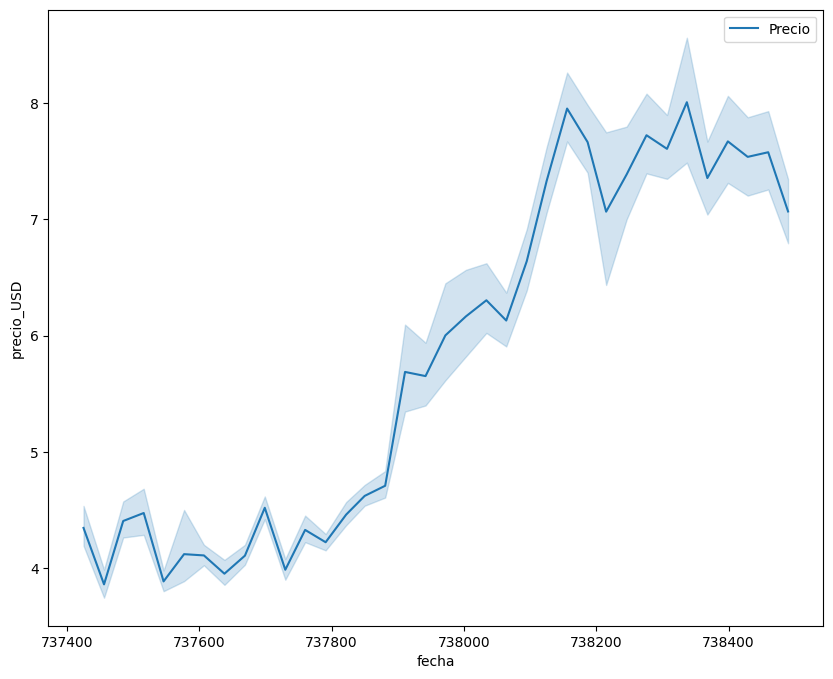

In [15]:
plt.figure(figsize = (10,8))
sns.lineplot(data, x="fecha", y = "precio_USD", label = 'Precio')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X=data.fecha.values
X=X.reshape(-1,1)
y=data.precio_USD.values
y=y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
X_train

array([[737791],
       [737791],
       [738399],
       ...,
       [738307],
       [737730],
       [737850]], dtype=int64)

In [18]:
from sklearn.linear_model import LinearRegression

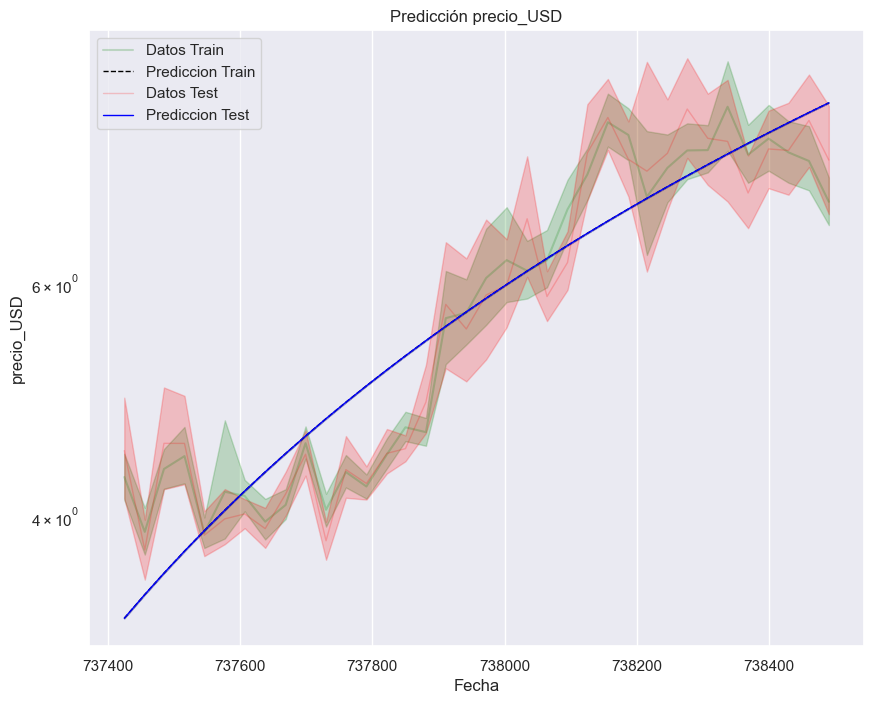

Error en datos de train: 1470.842472630023
Error en datos de test: 1426.6607998840404


In [19]:
# Ajustar los parámetros para evitar el error de Overflow
plt.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['path.simplify_threshold'] = 1.0

model = LinearRegression(fit_intercept=True)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.lineplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.lineplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.lineplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')


plt.yscale('log')
plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")

plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_train_mse = mean_squared_error(y_train, y_train_pred)

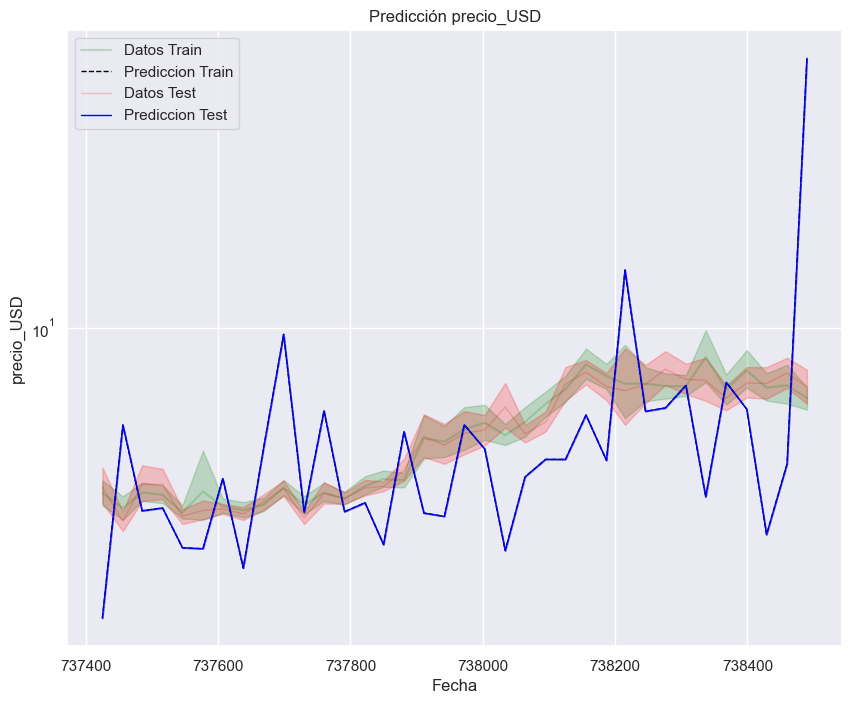

Error en datos de train: 1791.0228577329815
Error en datos de test: 1457.929485133187


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Tomar una muestra más pequeña del conjunto de entrenamiento
frac = 0.5  # Tamaño de muestra deseado (10%)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, test_size=1-frac, random_state=42)

# Entrenar el modelo KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=40)
model.fit(X_train, y_train)

#model = KNeighborsRegressor(n_neighbors=3)
#model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.lineplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.lineplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.lineplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')

plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")
plt.yscale('log')


plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

knr_test_mse = mean_squared_error(y_test, y_test_pred)
knr_train_mse = mean_squared_error(y_train, y_train_pred)

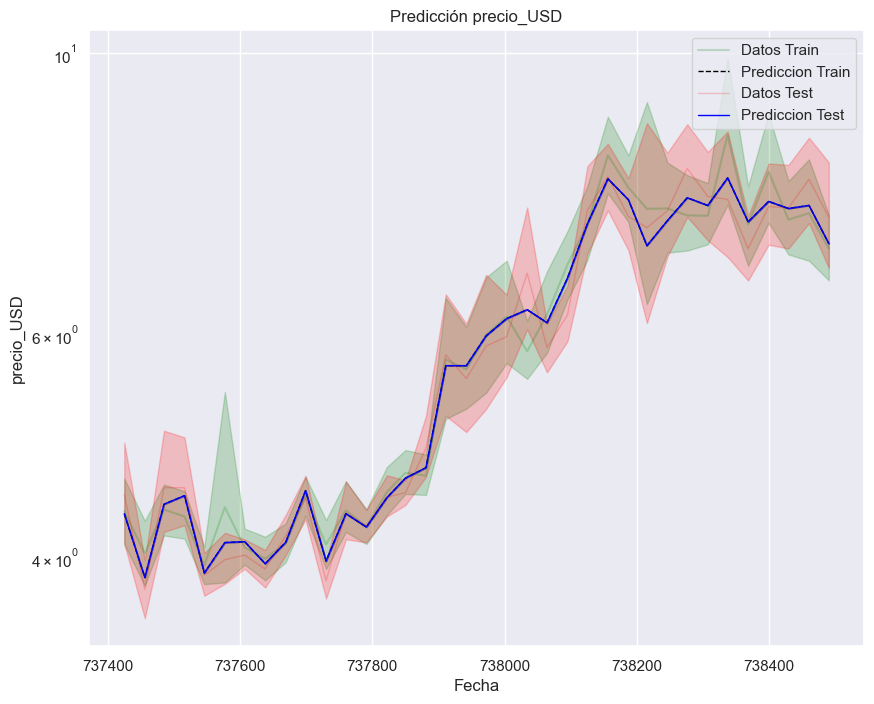

Error en datos de train: 1759.0651158709086
Error en datos de test: 1426.3731406691256


In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.lineplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.lineplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.lineplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')

plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")
plt.yscale('log')


plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

rfr_test_mse = mean_squared_error(y_train, y_train_pred)
rfr_train_mse = mean_squared_error(y_test, y_test_pred)

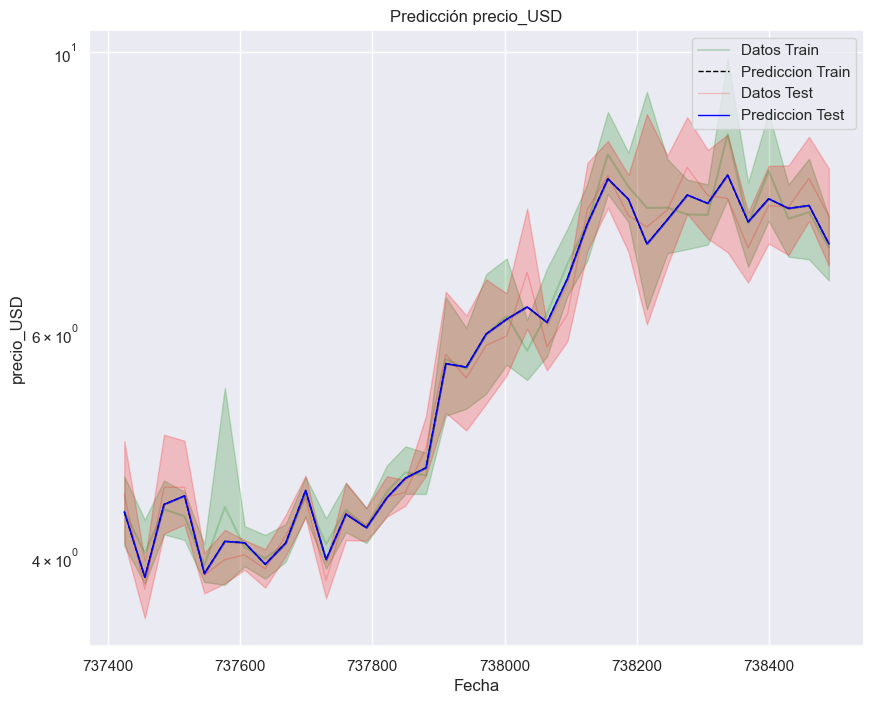

Error en datos de train: 1759.0643737055475
Error en datos de test: 1426.3719820395743


In [40]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize = (10,8))
sns.set_theme()

sns.lineplot(x=X_train.squeeze(), y=y_train.squeeze(), color='green', alpha=0.2, label='Datos Train')
sns.lineplot(x=X_train.squeeze(), y=y_train_pred.squeeze(), color='black', linewidth=1.0, linestyle='--', label='Prediccion Train')

sns.lineplot(x=X_test.squeeze(), y=y_test.squeeze(), color='red', linewidth=1.0, alpha=0.2, label='Datos Test')
sns.lineplot(x=X_test.squeeze(), y=y_test_pred.squeeze(), color='blue', linewidth=1.0, label='Prediccion Test')

plt.xlabel("Fecha")
plt.ylabel("precio_USD")
plt.title("Predicción precio_USD")
plt.yscale('log')


plt.legend()
plt.show()

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

xgb_test_mse = mean_squared_error(y_train, y_train_pred)
xgb_train_mse = mean_squared_error(y_test, y_test_pred)

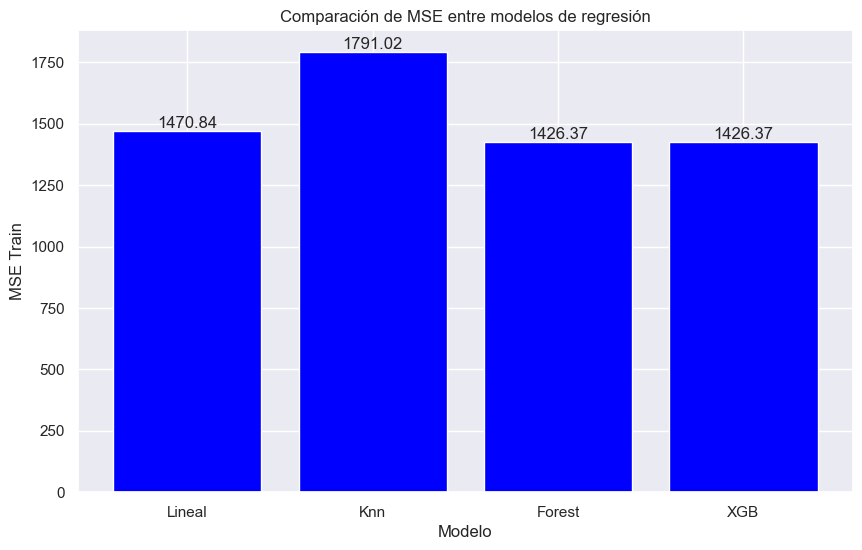

In [41]:
valores = [lr_train_mse, knr_train_mse, rfr_train_mse, xgb_train_mse]

nombres = ['Lineal', 'Knn', 'Forest', 'XGB']

plt.figure(figsize=(10, 6))
plt.bar(nombres, valores, color='blue')

plt.xlabel('Modelo')
plt.ylabel('MSE Train')
plt.title('Comparación de MSE entre modelos de regresión')

for i, value in enumerate(valores):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

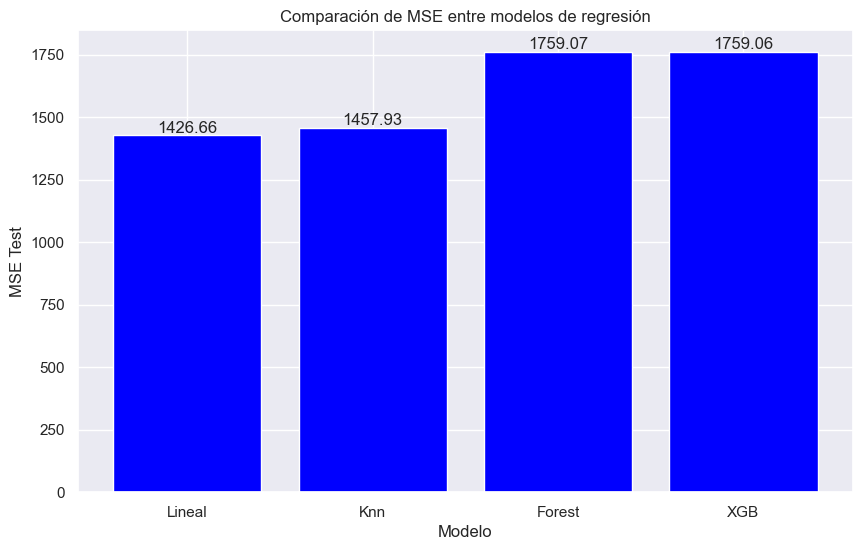

In [42]:
valores = [lr_test_mse, knr_test_mse, rfr_test_mse, xgb_test_mse]

nombres = ['Lineal', 'Knn', 'Forest', 'XGB']

plt.figure(figsize=(10, 6))
plt.bar(nombres, valores, color='blue')

plt.xlabel('Modelo')
plt.ylabel('MSE Test')
plt.title('Comparación de MSE entre modelos de regresión')

for i, value in enumerate(valores):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
print("MSE:", mse)

MSE: 1426.3719820395743


In [44]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 37.76734015044711


In [45]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE:", mae)

MAE: 5.1409377210207134


In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print("R^2:", r2)

R^2: 0.0015821742877203393


In [38]:
data2=dfxx[['id','cliente_nombre', 'fecha', 'precio_USD','total_costo_USD','margen_ganancia_USD','zona_destino','provincia_destino','clasificacion del cliente']].copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168797 entries, 0 to 2168796
Data columns (total 9 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   id                         int64         
 1   cliente_nombre             object        
 2   fecha                      datetime64[ns]
 3   precio_USD                 float64       
 4   total_costo_USD            float64       
 5   margen_ganancia_USD        float64       
 6   zona_destino               object        
 7   provincia_destino          object        
 8   clasificacion del cliente  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 148.9+ MB


In [39]:
data2.head()

,id,cliente_nombre,fecha,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente
0,398567,SmartGenetics SRL,2020-01-01,8.809524,1.111111,7.698413,AMBA,BUENOS AIRES,Muy bueno
1,416738,SmartGenetics SRL,2020-01-01,8.809524,1.111111,7.698413,AMBA,BUENOS AIRES,Muy bueno
2,416708,SmartGenetics SRL,2020-01-01,8.809524,1.111111,7.698413,AMBA,BUENOS AIRES,Muy bueno
3,416709,SmartGenetics SRL,2020-01-01,10.238095,1.111111,9.126984,AMBA,BUENOS AIRES,Muy bueno
4,416710,SmartGenetics SRL,2020-01-01,10.238095,1.111111,9.126984,AMBA,BUENOS AIRES,Muy bueno


In [41]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['cliente_nombre','zona_destino','provincia_destino','clasificacion del cliente']
le = LabelEncoder()

for column in categorical_columns:
    data2[column] = le.fit_transform(data2[column])
    
data2['fecha']=data2['fecha'].map(dt.datetime.toordinal)    

In [42]:
data2.head()

,id,cliente_nombre,fecha,precio_USD,total_costo_USD,margen_ganancia_USD,zona_destino,provincia_destino,clasificacion del cliente
0,398567,317,737425,8.809524,1.111111,7.698413,0,0,2
1,416738,317,737425,8.809524,1.111111,7.698413,0,0,2
2,416708,317,737425,8.809524,1.111111,7.698413,0,0,2
3,416709,317,737425,10.238095,1.111111,9.126984,0,0,2
4,416710,317,737425,10.238095,1.111111,9.126984,0,0,2


In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Paso 1: Preparar los datos
data2_clean = data2.dropna(subset=['margen_ganancia_USD'])
X = data2_clean.drop('margen_ganancia_USD', axis=1)  # Características
y = data2_clean['margen_ganancia_USD']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Aplicar PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalizar características
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=['PC1', 'PC2'])
relevant_variables = loadings.abs().sort_values(by='PC1', ascending=False).head(5).index

# Paso 3: Construir y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train[relevant_variables], y_train)

# Paso 4: Realizar predicciones y evaluar el modelo
X_test_pca = pca.transform(scaler.transform(X_test))
y_pred = model.predict(X_test[relevant_variables])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación: {r2}")


Error cuadrático medio: 1464.5113194960431
Coeficiente de determinación: 0.004565430893731737
